In [2]:
import numpy as np
import matplotlib.pyplot as plt
state_wheather = ("sunny", "cloudy", "rainy")

transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

## Задание 1. 
Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную states.

In [63]:
states=np.empty(20000, dtype = object)
state_wheather_number = (0, 1, 2)
nextw=np.array((0))
states[0]='sunny'
for i in range(1, 20000):
    nextw = np.random.choice(state_wheather_number,p=transition_matrix[nextw])
    if nextw == 0:
        states[i]='sunny'
    elif nextw == 1:
        states[i]='cloudy'
    else:
        states[i]='rainy'
        
print(states[:20])

['sunny' 'cloudy' 'cloudy' 'cloudy' 'sunny' 'sunny' 'sunny' 'rainy'
 'cloudy' 'sunny' 'rainy' 'sunny' 'sunny' 'sunny' 'rainy' 'cloudy'
 'cloudy' 'rainy' 'sunny' 'sunny']


# Задание 2. 
На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды. Должна получиться примерно следующая картинка:

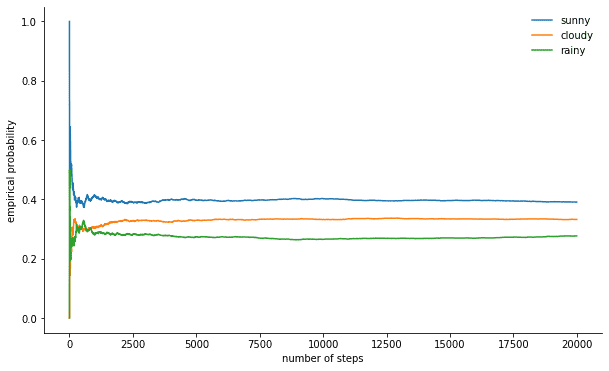

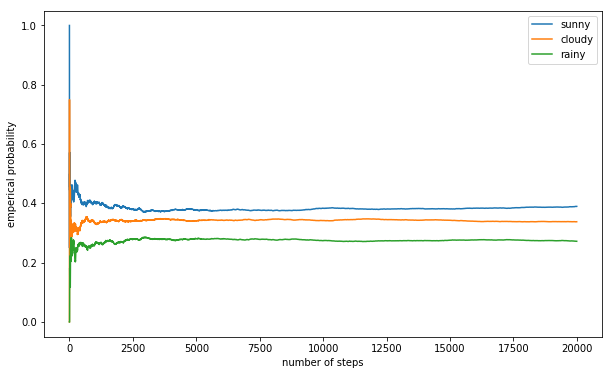

In [75]:
sunny=np.empty(19999)
cloudy=np.empty(19999)
for n in range(19999):
    sunny[n]=(states[:n+1]=='sunny').sum()/(n+1)
    cloudy[n]=(states[:n+1]=='cloudy').sum()/(n+1)
rainy=np.ones(19999)-sunny-cloudy

plt.plot(range(19999),sunny,label="sunny")
plt.plot(range(19999),cloudy,label="cloudy")
plt.plot(range(19999),rainy,label="rainy")
plt.xlabel('number of steps')
plt.ylabel('emperical probability')
plt.legend()
plt.show()

пыталась написать вместо:

sunny=np.empty(19999)

cloudy=np.empty(19999)

for n in range(19999):

    sunny[n]=(states[:n+1]=='sunny').sum()/(n+1)

    cloudy[n]=(states[:n+1]=='cloudy').sum()/(n+1)



вот это:

sunny=np.array([(states[:n+1]=='sunny').sum()/(n+1) for n in range (19999)])

cloudy=np.array([(states[:n+1]=='cloudy').sum()/(n+1) for n in range (19999)])


но оно так считает неправильно массивы. почему? я ошибку найти не смогла

# Задание 3. 
Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

1)


In [99]:
s=0
c=0
r=0
for i in range (20000):
    if states[i]=='sunny':
        s+=1
    elif states[i]=='cloudy':
        c+=1
    else:
        r+=1
list = [s/20000, c/20000, r/20000]
x = np.array(list)
print(x)
print(np.dot(x,transition_matrix))

[0.3898  0.33805 0.27215]
[0.389725 0.333805 0.27647 ]


2)

In [100]:
P = transition_matrix
for i in range(1,200):
    P = np.dot(P,transition_matrix)
for i in range(201,205):
    P = np.dot(P,transition_matrix)
    print(P)

[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]
[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]
[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]
[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]


Приведенный выше пример показывает, что в некоторых Марковских цепях со временем устанавливается стационарное распределение. Такие цепи называются эргодическими. На самом деле, для эргодичности достаточно, чтобы все элементы матрицы Р были строго положительны (об этом говорит эргодическая теорема). Дальше мы этим воспользуемся для моделирования случайных величин.

MCMC (Markov Chain Monte Carlo)
Рассмотрим разачу: кандидат в губернаторы объезжает города свого края с целью агитации. Каждый день для выбора следующего города он случайным образом намечает один из городов, соседних к текущему. Если число жителей в намеченном городе больше, чем в текущем, кандидат перемещается в намеченный город. В противном случае кандидат перемещается в намеченный город с вероятностью, равной отношению числа жителей этого города к числу жителей текущего, либо остается в текущем еще на один день. Проведя достаточно долгую агитационную кампанию выясняется, что доля времени, проведенная в каждом городе, пропорциональна числу жителей этого города. Тем самым, процесс перемещения по городам можно рассматривать как процесс генерации случайных величин (городов) из распределения, которое задается числом жителей в городах. Посмотрим, как это работает:

Задаем популяцию 15 городов случайными числами от 10 до 100:

[ ]
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)
cities = np.random.randint(10, 100, 15)

plt.bar(np.arange(len(cities)), cities)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()


На гистограмму выше нужно смотреть как на распределение, из которого мы хотим научиться моделировать случайные величины.

Задаем функцию, которая определяет номер следующего города, куда отправляется кандитат (возможно, остается в текущем городе). Для простоты будем перемещаться только в города с номерами на 1 больше или меньше, чем текущий:

[ ]
def step(current, cities):
    direction = np.random.choice([-1, 1])
    target = (current + direction) % len(cities)
    ratio = cities[target] / cities[current]
    return target if np.random.rand() < ratio else current
Моделируем перемещения кандитата за период 10000 дней:

[ ]
walk = []
current = 1 # стартуем из города с номером 1
for i in range(10000):
    current = step(current, cities)
    walk.append(current)
Рисуем гистограмму распределения доли времени, проведенного в каждом городе:

[ ]
plt.hist(walk, bins=np.arange(len(cities) + 1) - 0.5, rwidth=0.8, density=True)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()


Полученная гистограмма почти не отличается от гистограммы, задающей распределения числа жителей по городам. Таким образом, массив walk можно рассматривать как выборку из данного распределения, а предложенный процесс обхода городов - как генератор случайных чисел из этого распределения.

Несколько замечаний:

Полезно отбросить начальный кусок массива walk, пока последовательность не вышла на стационарный режим
В нашей реализации соседные элементы массива walk сильно скоррелированы (по определению, они отличаются не более чем на 1). Поэтому полезно проредить ряд, например, рассматривать каждый сотый элемент, и это даст выборку из почти независимых величин.
Общая идея MCMC:

построить эргодическую цепь Маркова, для которой стационарное распределение - это в точности наше заданное распределение

инициировать блуждание по цепи Маркова из некоторого начального состояния и дождаться, когда распределение сойдется в стационарному. С этого момента состояния цепи Маркова можно считать выборкой из желаемого распределения.

Алгоритм Metropolis sampling:

пусть π - заданное распределение (не обязательно нормированное к 1) на множестве Ω
пусть Q=(qi,j) - матрица переходных вероятностей произвольной эргодической цепи Маркова с состояниями из Ω
выберем произвольное X0 из Ω
для текущего Xn смоделируем значение Zn+1 из распределения qXn,⋅
смоделируем случайную величину α из распределения Бернулли с вероятностью успеха
p=min(1,πiqi,jπjqj,i)
если α = 1, то Xn+1=Zn+1, иначе Xn+1=Xn.
Реализуем алгоритм Metropolis sampling. Функция metroplis принимает на вход

начальное состояние цепи Маркова (start)
функцию, вычисляющую значение плотности в произвольной точке (функция value)
функцию, предлагающую выбор нового состояния (функция proposal)
количество итераций (niter)
[ ]
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]
В приложение к предыдущей задаче вот как определяются value и proposal и как выглядит гистограмма, полученная по смоделированной выборке:

[ ]
value = lambda x: cities[x]
proposal = lambda x: (x + np.random.choice([-1, 1])) % len(cities)
post = metroplis(1, value, proposal, 10000)

plt.hist(post, bins=np.arange(len(cities) + 1) - 0.5, rwidth=0.8, density=True)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()




# Задание 4. 
Примените алгоритм Metropolis для генерации выборки из смеси двух гауссиан. Плотность смеси задается в виде p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

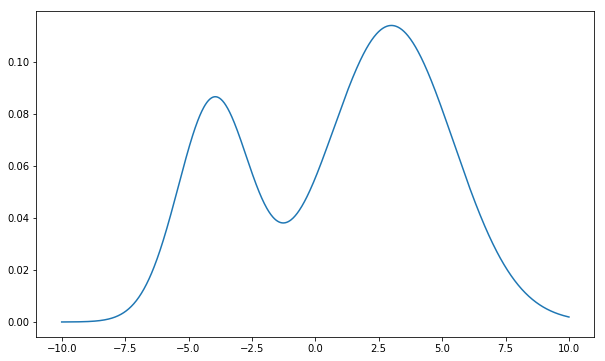

In [101]:
from scipy.stats import norm

x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

plt.plot(x, y)
plt.show()

In [103]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

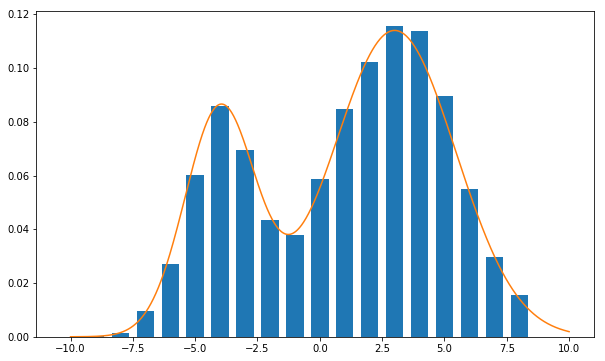

In [120]:
value = lambda x: 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
proposal = lambda x: (x + np.random.choice([-1, 1])+10) % 20 - 10
post = metroplis(1, value, proposal, 10000)


plt.hist(post, bins=np.arange(20)-10.5, rwidth=0.7, density=True)
x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
plt.plot(x, y)
plt.show()